 # Heart Attack Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# Display shape of the dataset
print("Shape of the dataset:", df.shape)
display(df.head())

Shape of the dataset: (303, 14)


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [4]:
# Display statistical summary
print("Statistical Summary:")
display(df.describe().T)

Statistical Summary:


count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Number of duplicate rows: 1


In [6]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
print("A duplicate row:")
display(duplicate_rows)

# Remove duplicate rows
df = df.drop_duplicates()

# Check the new shape of the dataset
new_shape = df.shape
print("\nNew shape of the dataset:")
print(new_shape)

A duplicate row:


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1


New shape of the dataset:
(302, 14)


In [7]:
# Display the number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [8]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", non_numerical_columns)


Numerical Columns:
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Categorical Columns:
 []


In [9]:
# Identify numerical columns that do not have continuous values (discrete values)
discrete_columns = [
    col for col in numerical_columns if len(df[col].unique()) < 10
]

print("Discrete Columns:", discrete_columns)

Discrete Columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [10]:
# Get unique values for each discrete column
unique_values = {col: df[col].unique() for col in discrete_columns}

# Display unique values for each discrete column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")


Unique values in 'sex': [1 0]
Unique values in 'cp': [3 2 1 0]
Unique values in 'fbs': [1 0]
Unique values in 'restecg': [0 1 2]
Unique values in 'exng': [0 1]
Unique values in 'slp': [0 2 1]
Unique values in 'caa': [0 2 1 3 4]
Unique values in 'thall': [1 2 3 0]
Unique values in 'output': [1 0]


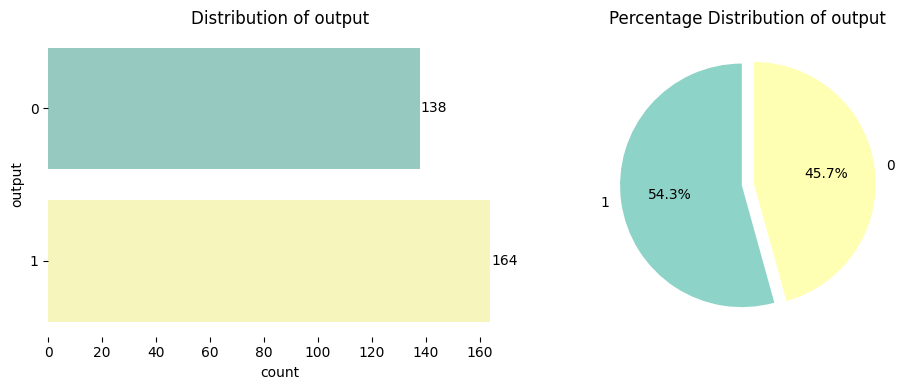

In [13]:
# Target column
target_column = 'output'

# Create visualizations for the target variable
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=target_column, data=df, palette='Set3')
plt.title(f'Distribution of {target_column}')

# Add annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[target_column].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set3'),
    startangle=90,
    explode=[0.05] * df[target_column].nunique()
)
plt.title(f'Percentage Distribution of {target_column}')
plt.ylabel('')

plt.tight_layout()
plt.show()

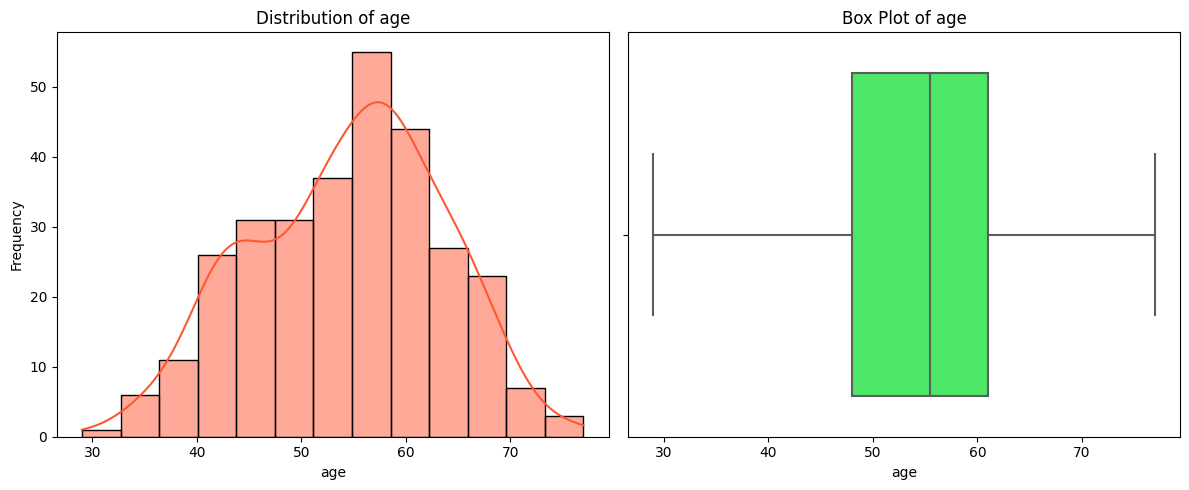

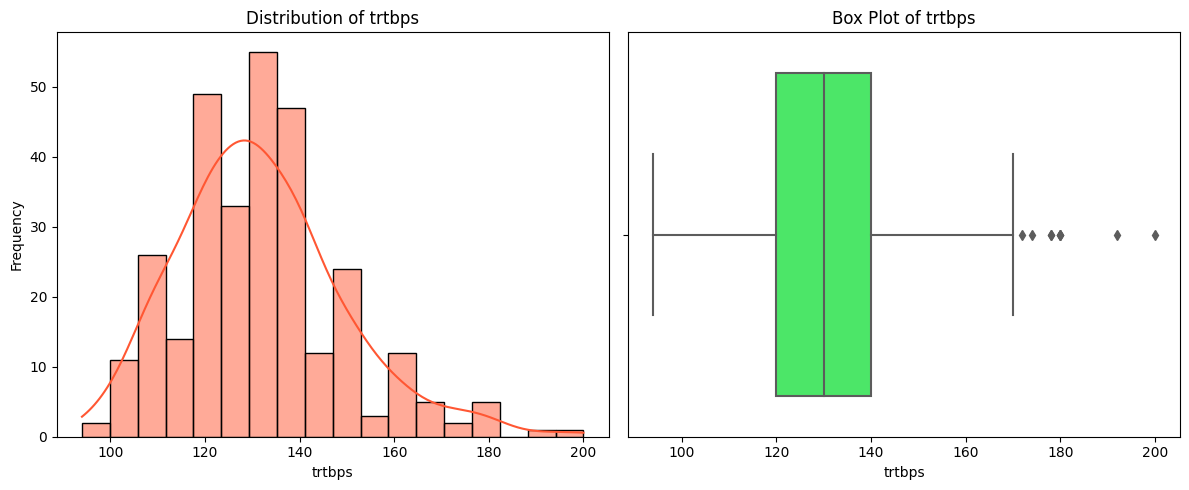

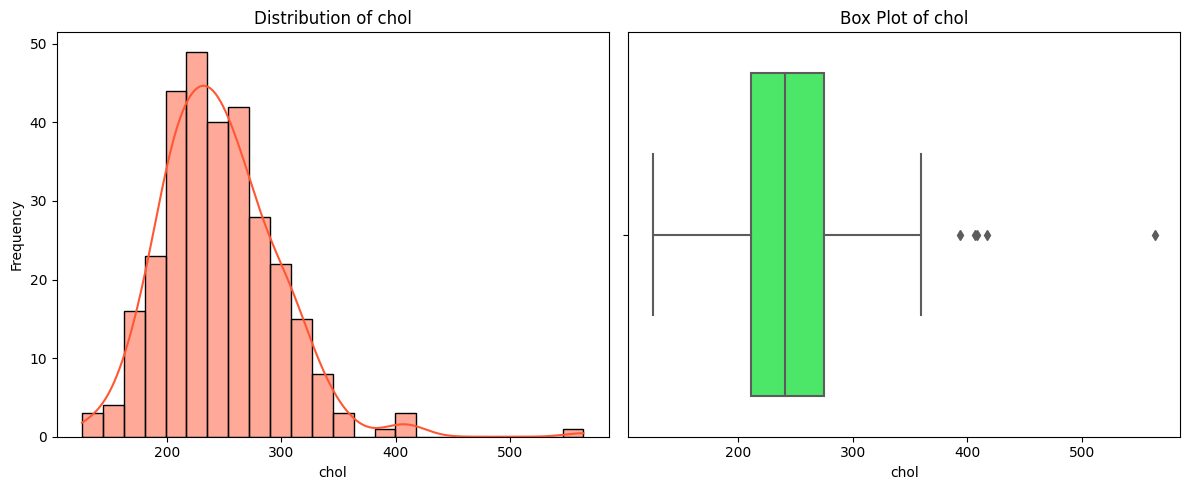

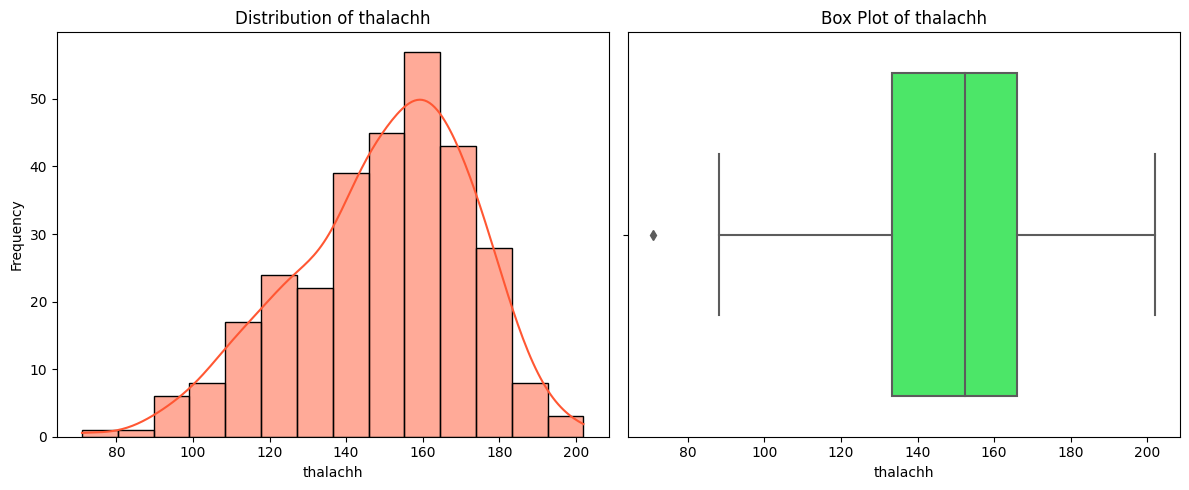

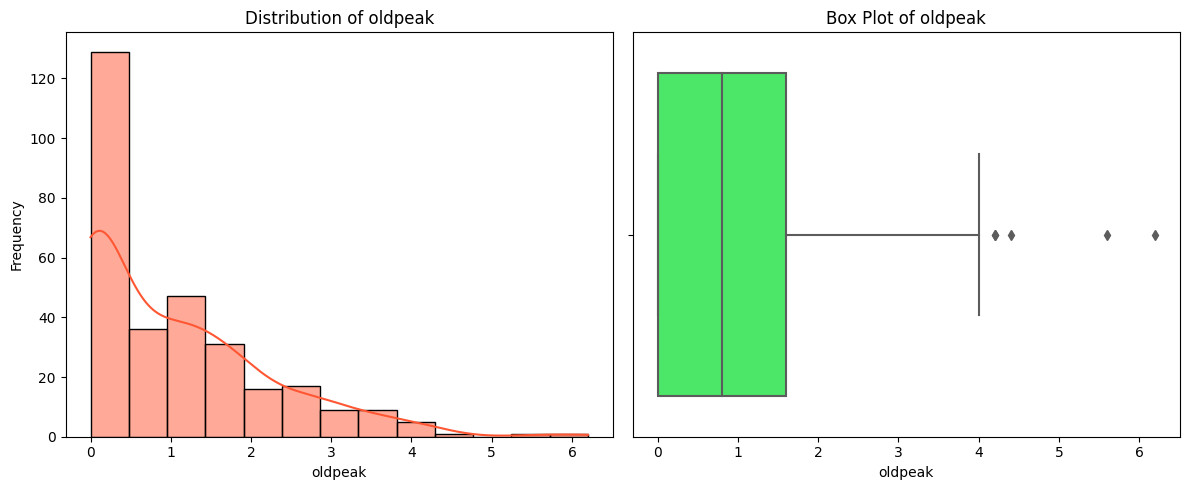

In [17]:
def plot_continuous_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, color="#FF5733")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color="#33FF57")
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

# Apply to continuous columns in the dataset
continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plot_continuous_distributions(df, continuous_columns)

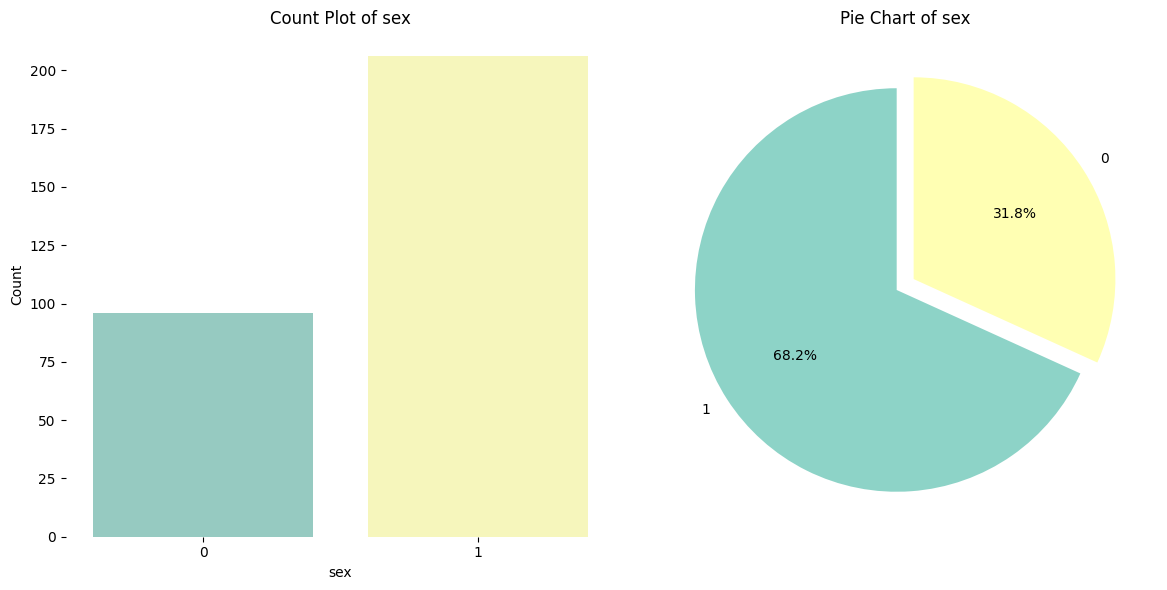

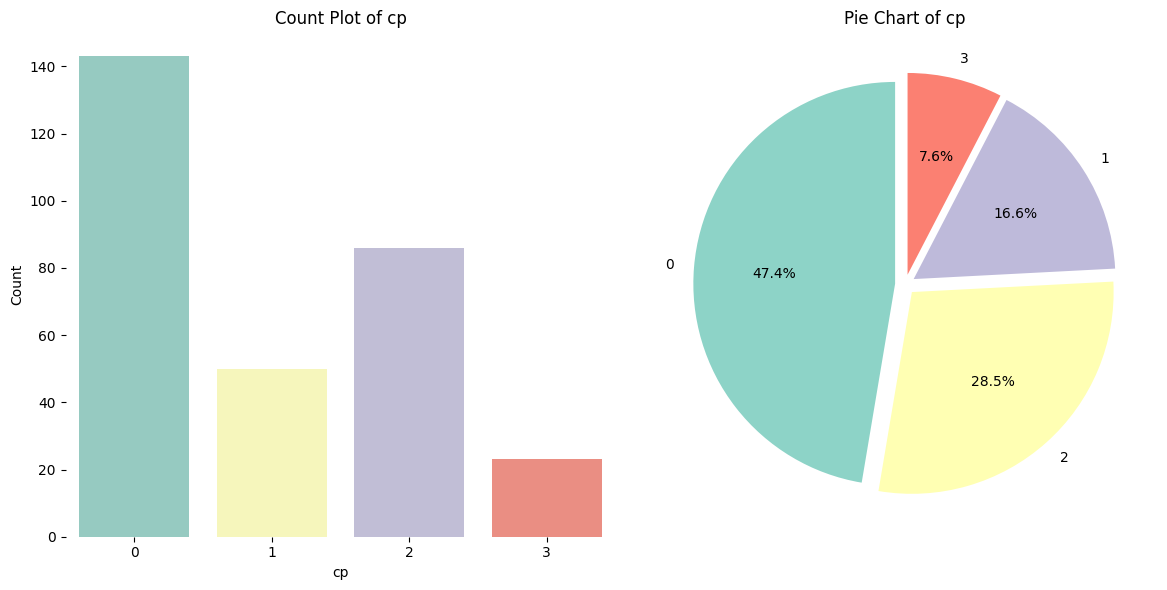

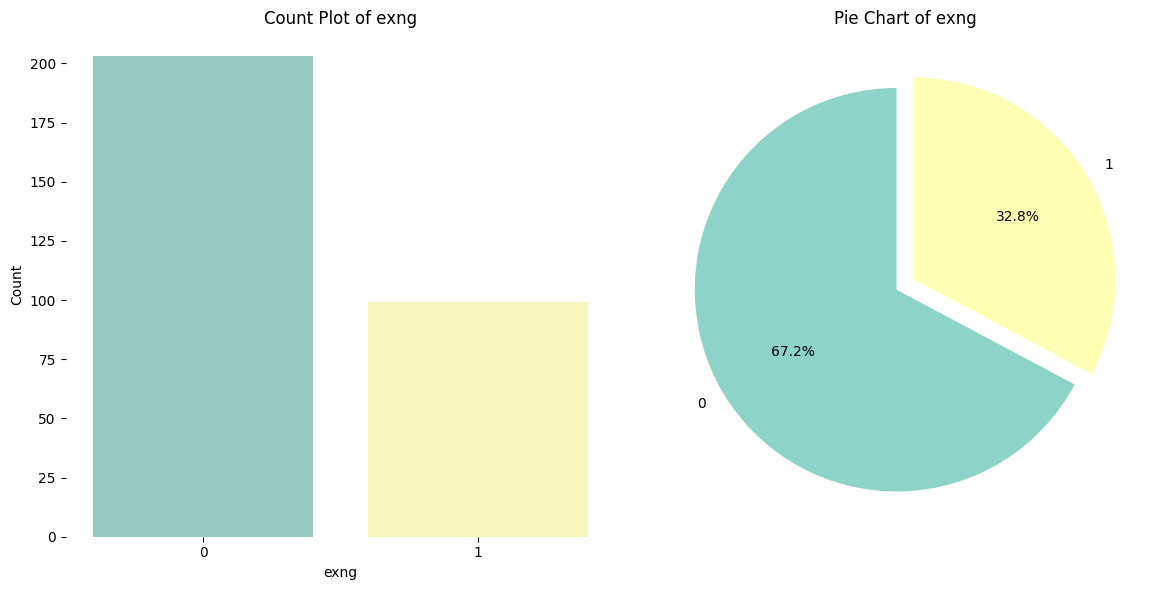

In [18]:
def plot_discrete_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))

        # Count Plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, data=df, palette="Set3")
        plt.title(f"Count Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        sns.despine(left=True, bottom=True)

        # Pie Chart
        plt.subplot(1, 2, 2)
        df[column].value_counts().plot.pie(
            autopct='%1.1f%%',
            colors=sns.color_palette('Set3'),
            startangle=90,
            explode=[0.05] * df[column].nunique()
        )
        plt.title(f"Pie Chart of {column}")
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

# Apply to discrete columns
discrete_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
plot_discrete_distributions(df, discrete_columns)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

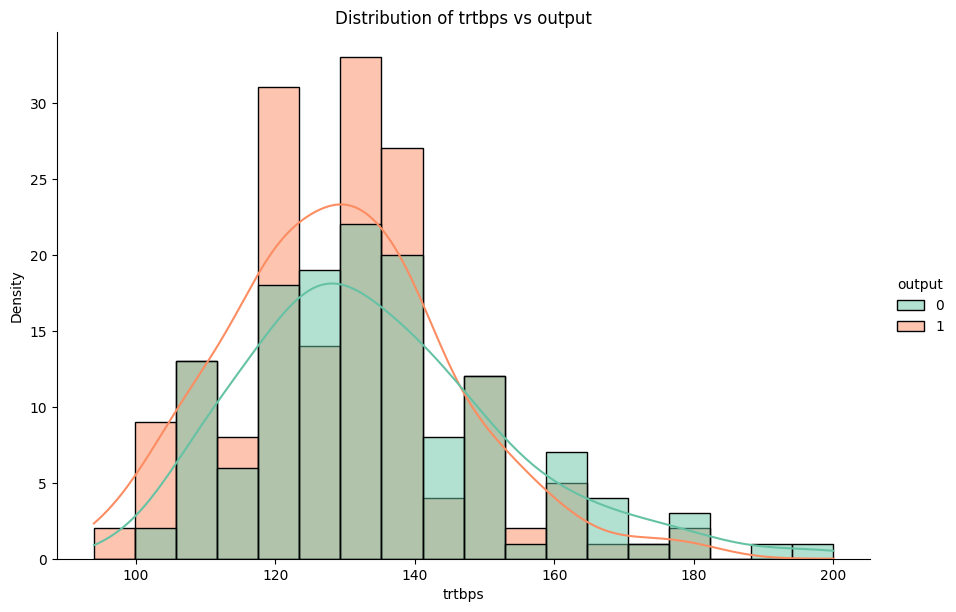

<Figure size 1000x600 with 0 Axes>

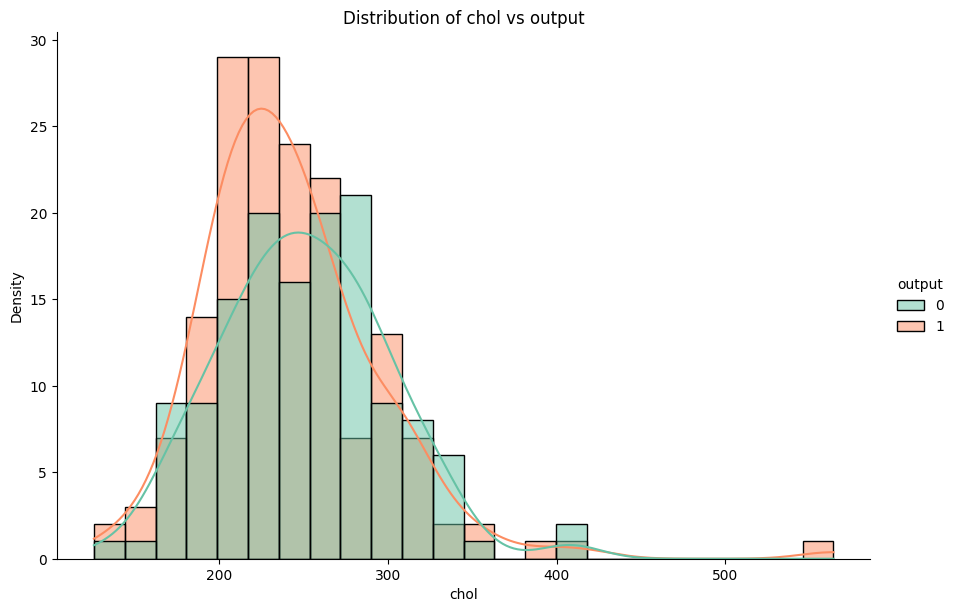

<Figure size 1000x600 with 0 Axes>

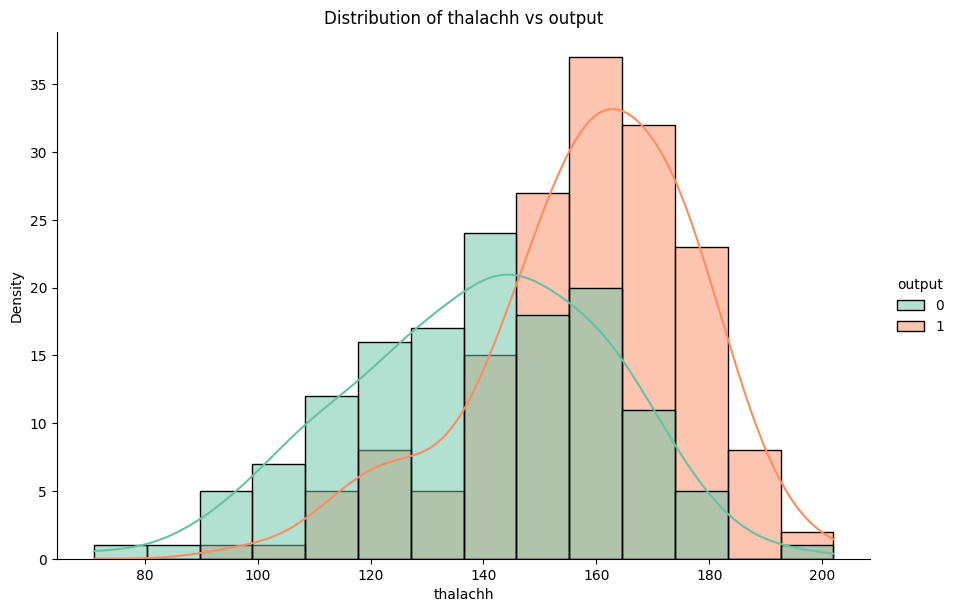

<Figure size 1000x600 with 0 Axes>

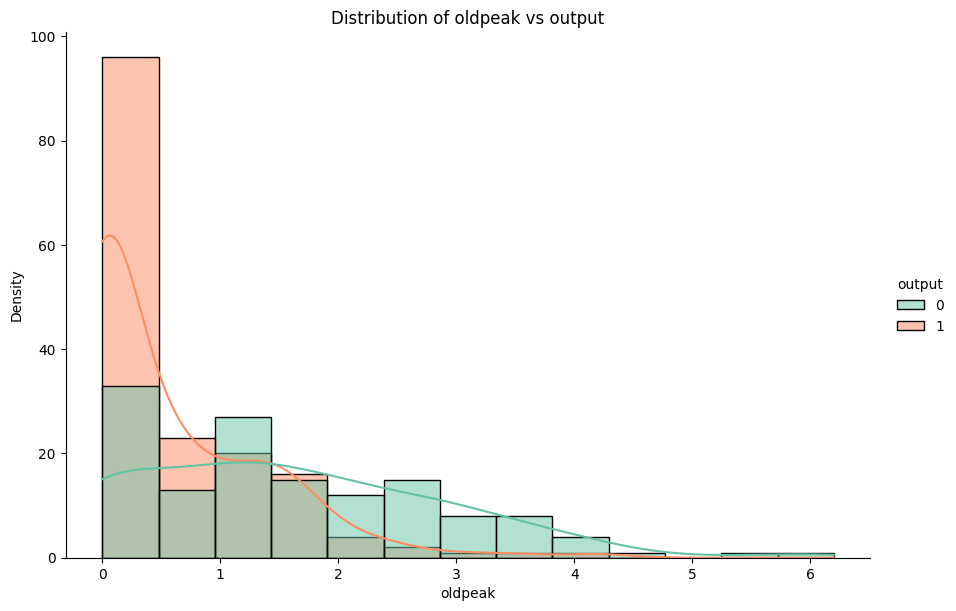

In [20]:
def plot_continuous_vs_target(df, continuous_columns, target_column):
    for column in continuous_columns:
        plt.figure(figsize=(10, 6))
        sns.displot(data=df, x=column, hue=target_column, kind='hist', kde=True, height=6, aspect=1.5, palette="Set2")
        plt.title(f"Distribution of {column} vs {target_column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.show()

# Example Usage: Continuous columns vs target
plot_continuous_vs_target(df, ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], 'output')

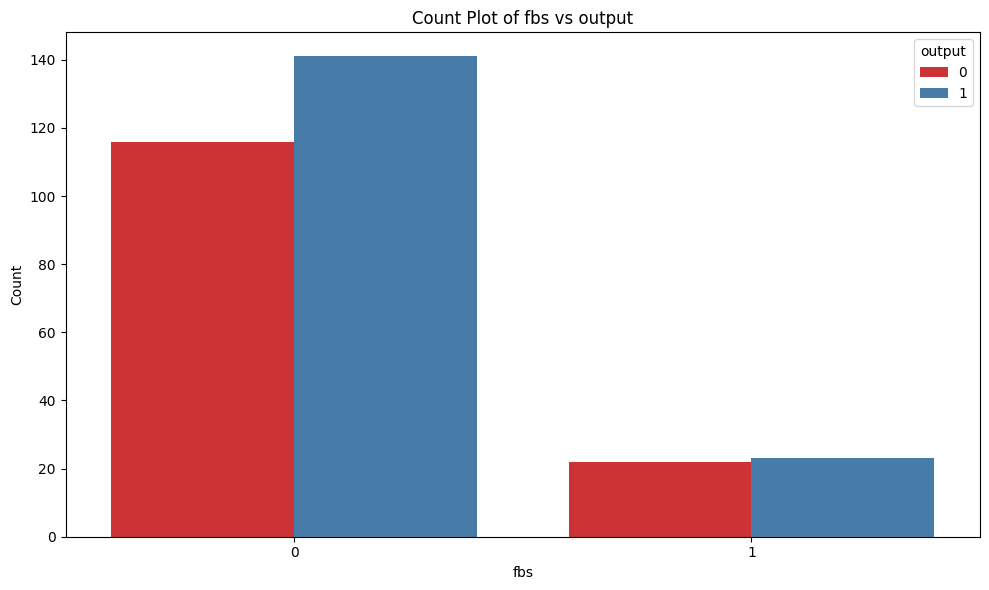

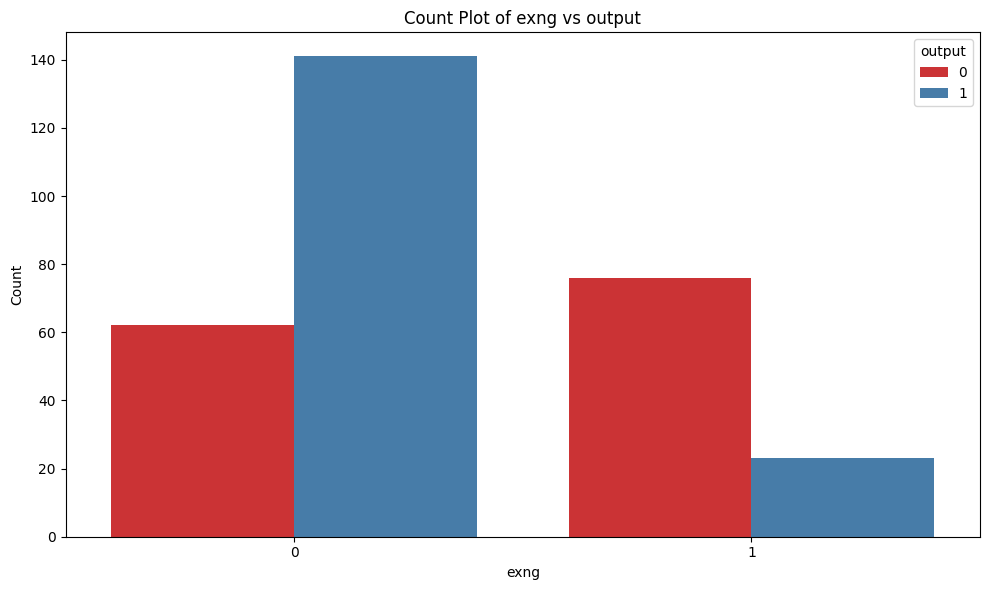

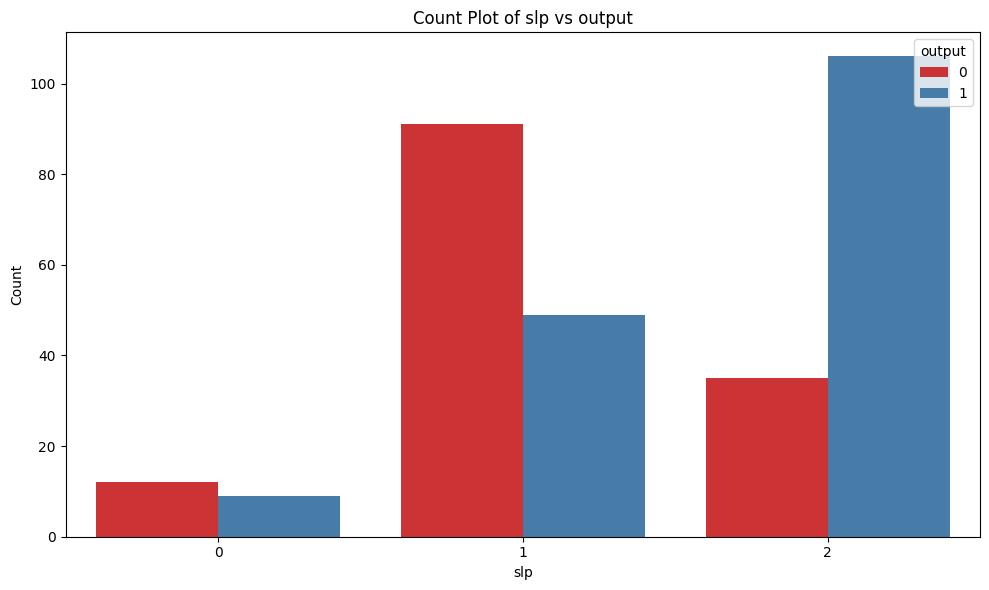

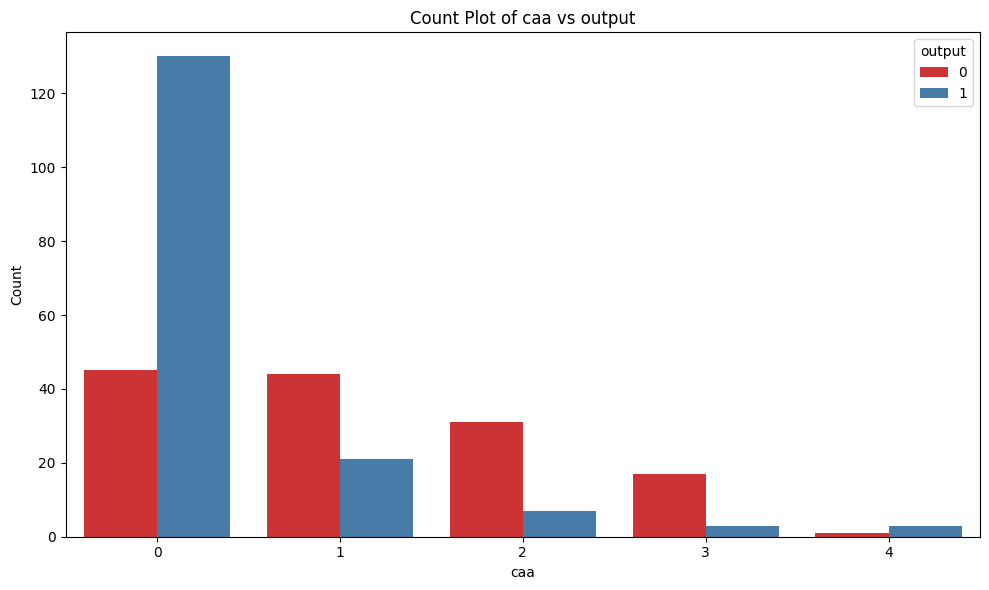

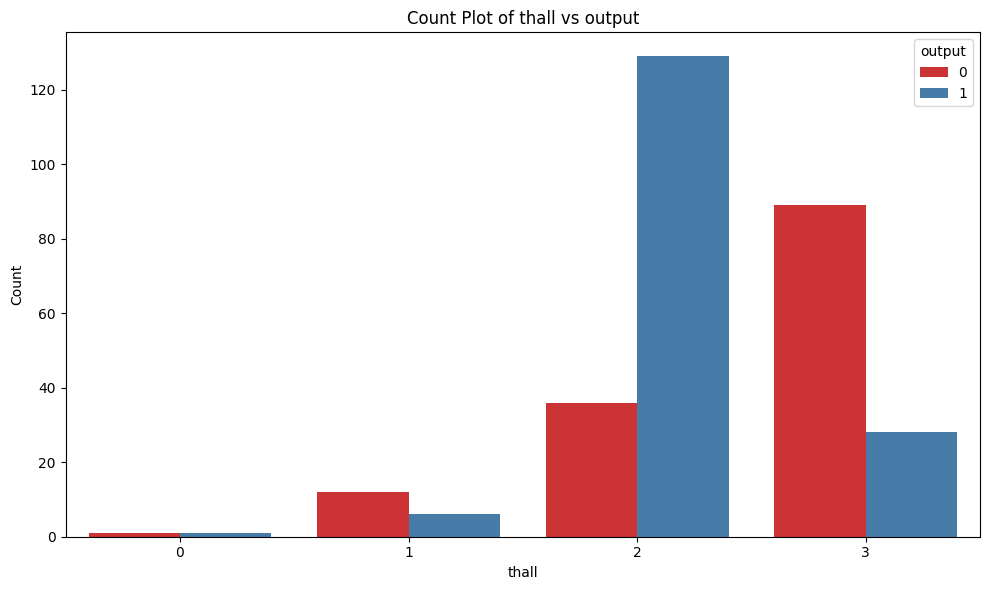

In [22]:
def plot_discrete_vs_target(df, discrete_columns, target_column):
    for column in discrete_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue=target_column, data=df, palette="Set1")
        plt.title(f"Count Plot of {column} vs {target_column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.legend(title=target_column, loc="upper right")
        plt.tight_layout()
        plt.show()

# Example Usage: Discrete columns vs target
plot_discrete_vs_target(df, ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], 'output')

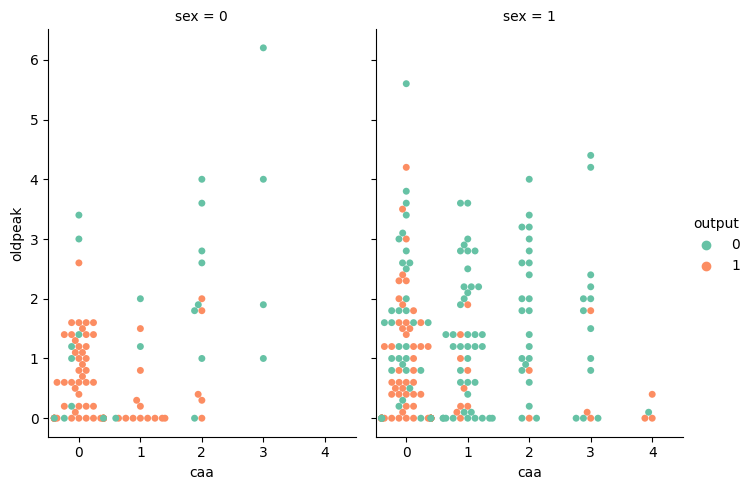

In [23]:
sns.catplot(
    data=df, x="caa", y="oldpeak", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set2"
)

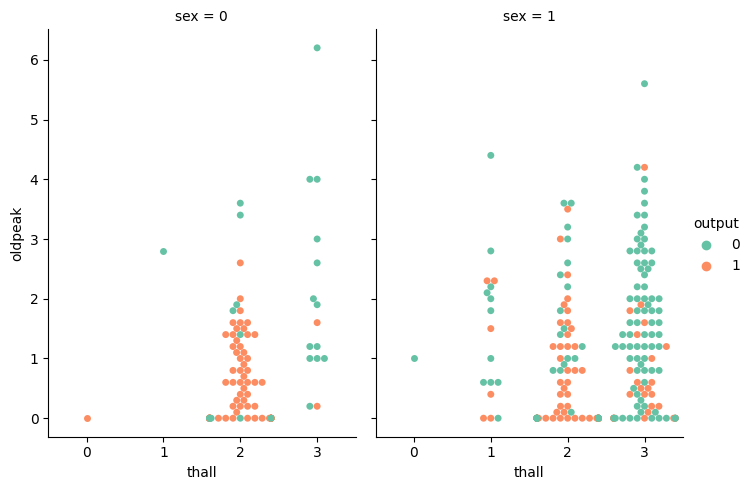

In [25]:
sns.catplot(
    data=df, x="thall", y="oldpeak", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set2"
)

In [26]:
sns.catplot(
    data=df, x="cp", y="trtbps", hue="output", kind="swarm", col="sex", aspect=.7, palette="Set2"
)

In [27]:

sns.catplot(
    data=df, x="cp", y="age", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set2"
)

In [28]:
sns.catplot(
    data=df, x="cp", y="chol", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set2"
)

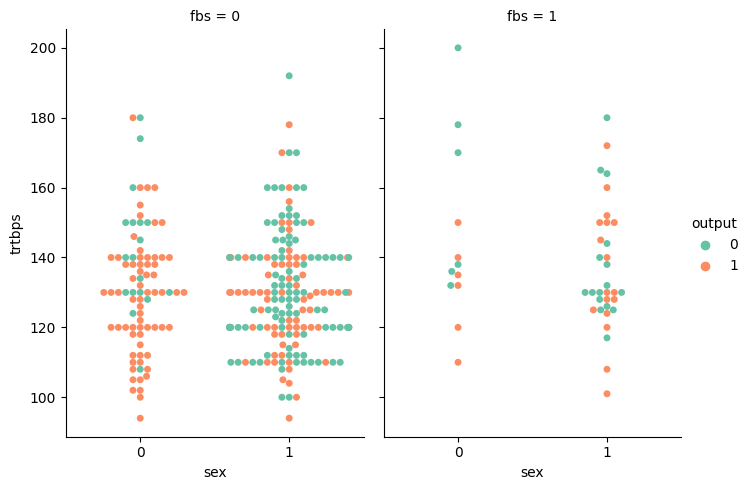

In [29]:
sns.catplot(
    data=df, x="sex", y="trtbps", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set2"
)

In [30]:
sns.catplot(
    data=df, x="sex", y="age", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set2"
)

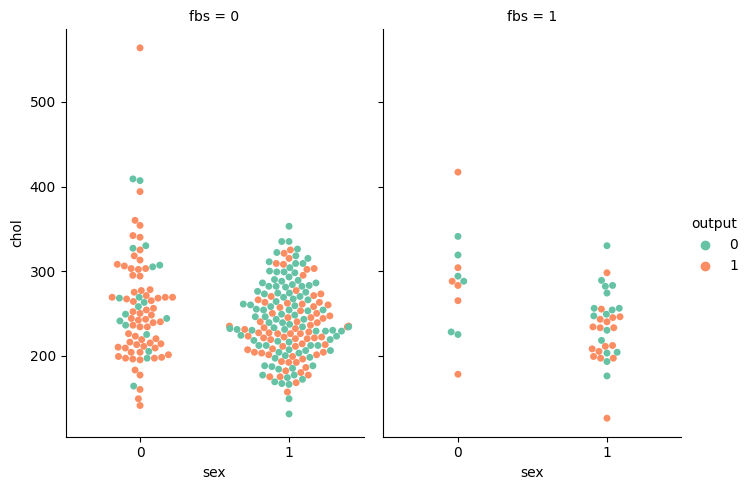

In [31]:
sns.catplot(
    data=df, x="sex", y="chol", hue="output", kind="swarm", col="fbs", aspect=.7, palette="Set2"
)

In [33]:
sns.pairplot(df, hue="output", diag_kind="hist", palette="Set1")

In [34]:
# Define the continuous columns
continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Calculate skewness and kurtosis for the specified continuous columns
skewness = df[continuous_columns].skew()
kurtosis = df[continuous_columns].kurt()

# Display results
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 age        -0.203743
trtbps      0.716541
chol        1.147332
thalachh   -0.532671
oldpeak     1.266173
dtype: float64

Kurtosis:
 age        -0.527512
trtbps      0.922996
chol        4.542591
thalachh   -0.062186
oldpeak     1.567876
dtype: float64


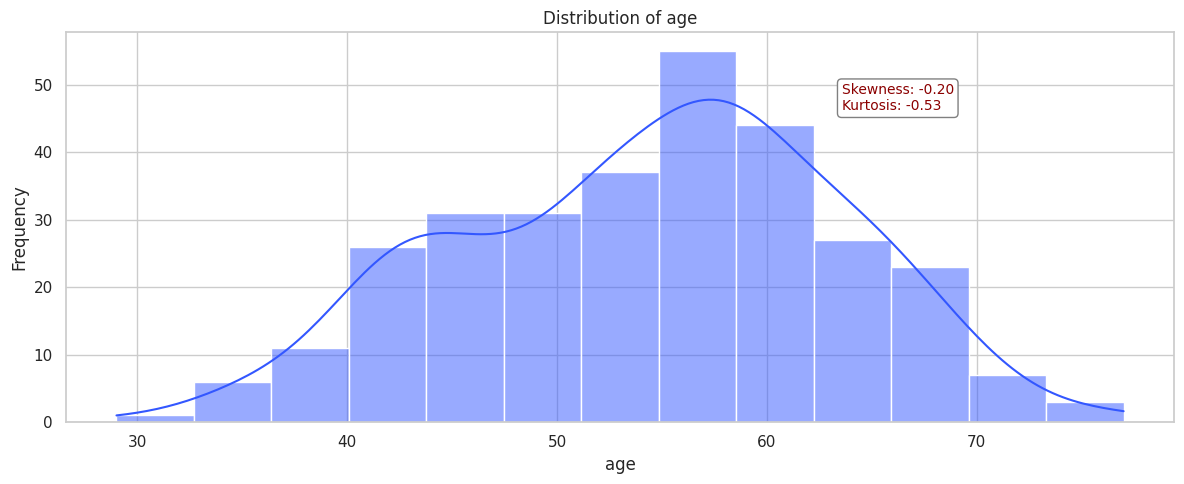

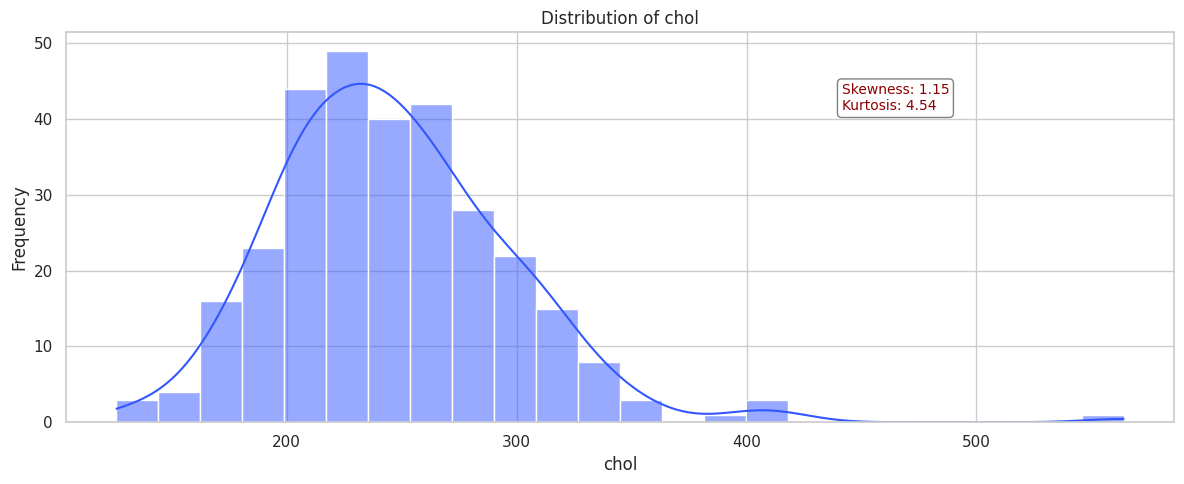

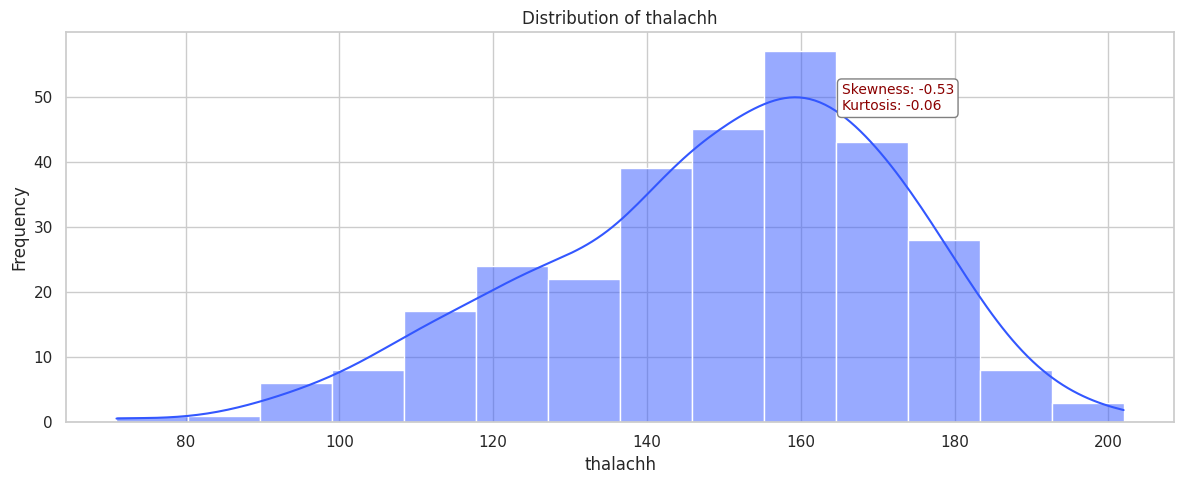

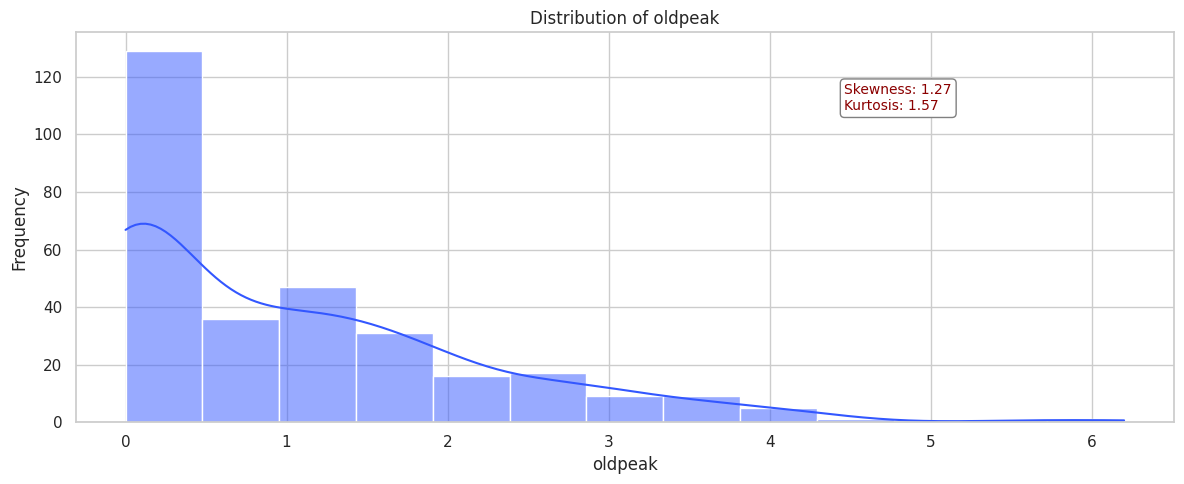

In [35]:
def visualize_skewness_kurtosis(df, columns):
    for column in columns:
        sns.set(style="whitegrid")
        plt.figure(figsize=(12, 5))

        sns.histplot(df[column], kde=True, color="#3357FF")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

        skewness = df[column].skew()
        kurtosis = df[column].kurt()
        plt.annotate(
            f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",
            xy=(0.7, 0.8),
            xycoords="axes fraction",
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"),
            fontsize=10,
            color="darkred",
        )

        plt.tight_layout()
        plt.show()

continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
visualize_skewness_kurtosis(df, continuous_columns)

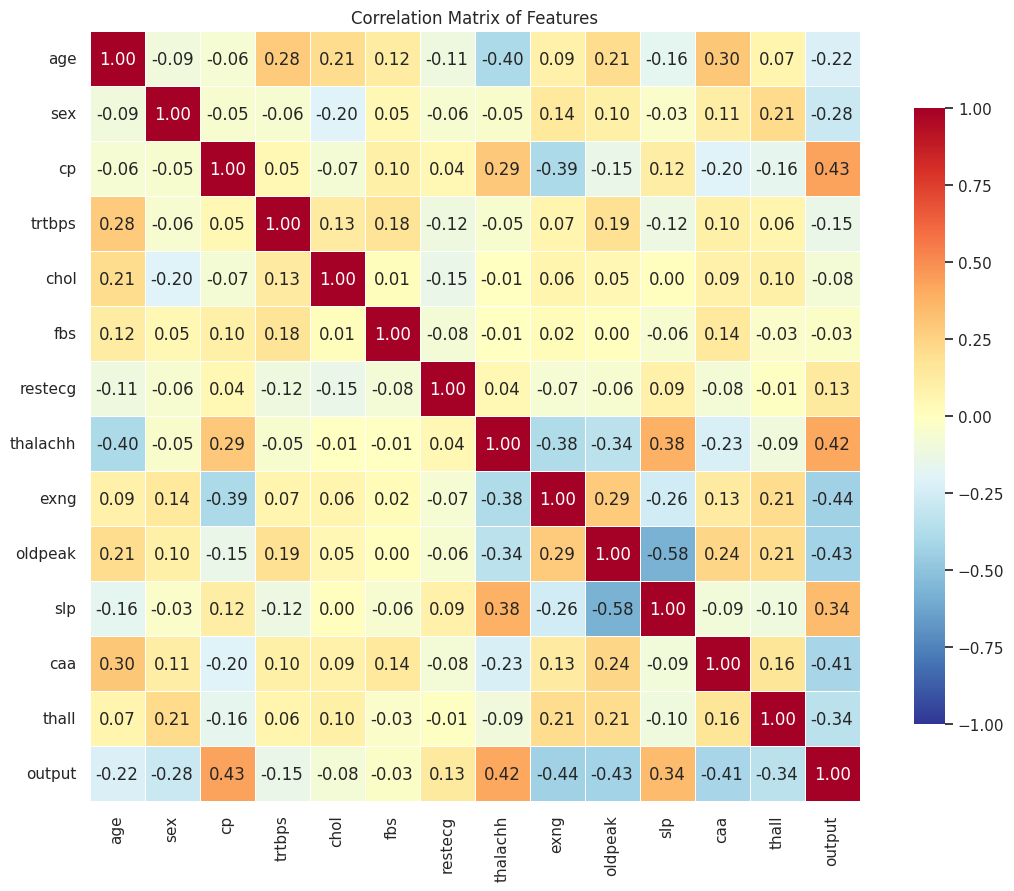

In [36]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title("Correlation Matrix of Features")
plt.show()


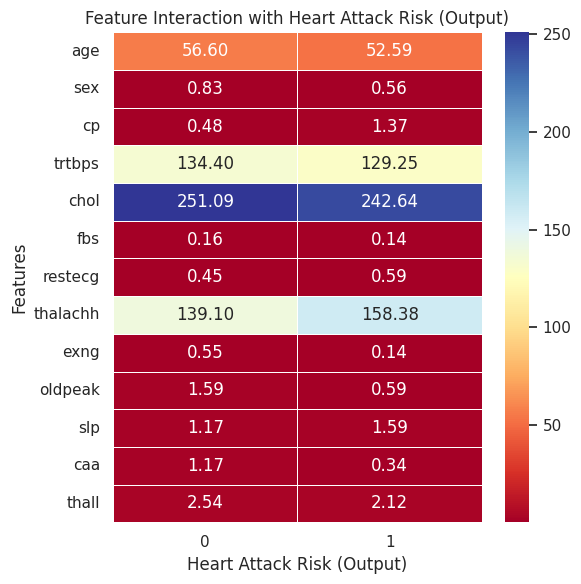

In [37]:
# Group by 'output' (target) and calculate mean values for features
target_correlation = df.groupby('output').mean().T

# Plot the heatmap for feature interaction with target variable
plt.figure(figsize=(6, 6))
sns.heatmap(
    target_correlation, 
    annot=True, 
    cmap='RdYlBu', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 1}
)
plt.title('Feature Interaction with Heart Attack Risk (Output)')
plt.ylabel('Features')
plt.xlabel('Heart Attack Risk (Output)')
plt.tight_layout()
plt.show()

In [38]:
def handle_skewness_kurtosis(df, columns):
    transformed_columns = {}
    
    for column in columns:
        skewness = df[column].skew()
        
        # Log transformation for positive skewness
        if skewness > 0.5:
            df[f'{column}_log'] = np.log1p(df[column])  # log1p handles log(0) by using log(1+x)
            transformed_columns[column] = f'{column}_log'
        
        # Square root transformation for moderate positive skewness
        elif 0 < skewness <= 0.5:
            df[f'{column}_sqrt'] = np.sqrt(df[column])
            transformed_columns[column] = f'{column}_sqrt'
        
        # Box-Cox transformation for non-negative values
        elif skewness < -0.5:
            df[f'{column}_boxcox'], _ = stats.boxcox(df[column] + 1)  # Adding 1 to ensure positivity
            transformed_columns[column] = f'{column}_boxcox'
        
        # No transformation needed for near-normal distributions
        else:
            transformed_columns[column] = column  # Keep original if no transformation is applied

    return df, transformed_columns

continuous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df_transformed, transformed_cols = handle_skewness_kurtosis(df, continuous_columns)

# Display the transformed DataFrame and the mapping of original to transformed columns
print("Transformed DataFrame:\n", df_transformed[transformed_cols.values()])
print("\nTransformed Columns Mapping:\n", transformed_cols)

Transformed DataFrame:
      age  trtbps_log  chol_log  thalachh_boxcox  oldpeak_log
0     63    4.983607  5.455321     33231.876350     1.193922
1     37    4.875197  5.525453     54240.788865     1.504077
2     41    4.875197  5.323010     45040.220314     0.875469
3     56    4.795791  5.468060     48607.183802     0.587787
4     57    4.795791  5.872118     39969.919807     0.470004
..   ...         ...       ...              ...          ...
298   57    4.948760  5.488938     21394.397677     0.182322
299   45    4.709530  5.579730     25022.170411     0.788457
300   68    4.976734  5.267858     28966.357345     1.481605
301   57    4.875197  4.882802     18431.161628     0.788457
302   57    4.875197  5.468060     46212.523924     0.000000

[302 rows x 5 columns]

Transformed Columns Mapping:
 {'age': 'age', 'trtbps': 'trtbps_log', 'chol': 'chol_log', 'thalachh': 'thalachh_boxcox', 'oldpeak': 'oldpeak_log'}


In [39]:
# List of original columns to drop
original_columns_to_drop = ['trtbps', 'chol', 'thalachh', 'oldpeak']

# Drop original columns from DataFrame
df_transformed.drop(columns=original_columns_to_drop, inplace=True)

# Display updated DataFrame
print("Updated DataFrame after dropping original columns:\n", df_transformed.head())

Updated DataFrame after dropping original columns:
    age  sex  cp  fbs  restecg  exng  slp  caa  thall  output  trtbps_log  \
0   63    1   3    1        0     0    0    0      1       1    4.983607   
1   37    1   2    0        1     0    0    0      2       1    4.875197   
2   41    0   1    0        0     0    2    0      2       1    4.875197   
3   56    1   1    0        1     0    2    0      2       1    4.795791   
4   57    0   0    0        1     1    2    0      2       1    4.795791   

   chol_log  thalachh_boxcox  oldpeak_log  
0  5.455321     33231.876350     1.193922  
1  5.525453     54240.788865     1.504077  
2  5.323010     45040.220314     0.875469  
3  5.468060     48607.183802     0.587787  
4  5.872118     39969.919807     0.470004  


In [40]:
# Define features and target
features = df_transformed.drop(columns=['output'])  # All columns except the target
target = df_transformed['output']  # Target variable

In [41]:
# Define features and target
features = df_transformed.drop(columns=['output'])  # All columns except the target
target = df_transformed['output']  # Target variable
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the splits for verification
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (241, 13)
Testing set shape: (61, 13)


In [42]:
# Apply RobustScaler to scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of scaled training data for verification
print("\nScaled Training Data:\n", X_train_scaled.head())


Scaled Training Data:
         age  sex   cp  fbs  restecg  exng  slp  caa  thall  trtbps_log  \
0 -1.076923  0.0  0.0  0.0      0.0   0.0  1.0  0.0    0.0   -0.519103   
1  0.923077  0.0  0.5  1.0     -1.0   1.0  0.0  0.0    1.0    2.113493   
2  0.846154  0.0 -0.5  1.0      0.0   0.0  0.0  2.0    1.0   -0.254400   
3 -0.076923 -1.0  0.0  0.0     -1.0   0.0  0.0  0.0    0.0    0.244870   
4  0.615385  0.0  0.5  0.0      0.0   0.0  1.0  0.0    0.0    0.480897   

   chol_log  thalachh_boxcox  oldpeak_log  
0  0.804616         0.363053    -0.615154  
1  0.516576        -0.069216     0.384846  
2  0.221023         0.400924    -0.424344  
3  0.159136         0.325468     0.301077  
4  1.300750         0.214424    -0.615154  


In [43]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Set probability=True for AUC calculation
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Display model names to confirm initialization
print("Initialized Models:")
for name in models.keys():
    print(name)

Initialized Models:
Logistic Regression
KNN
Support Vector Machine
Random Forest
Gradient Boosting



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



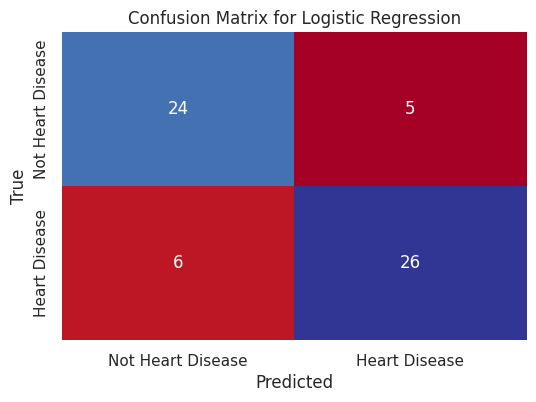


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



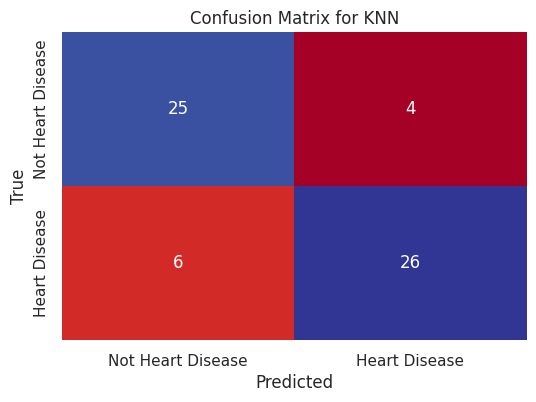


Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



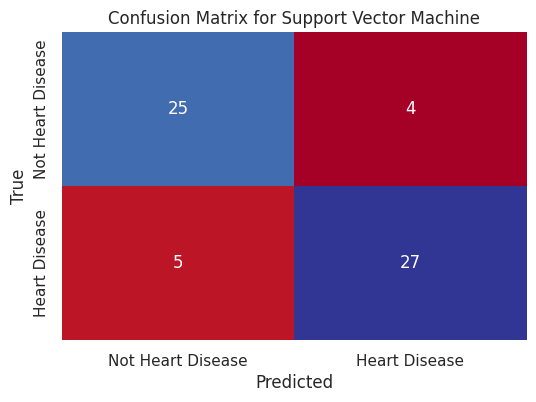


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



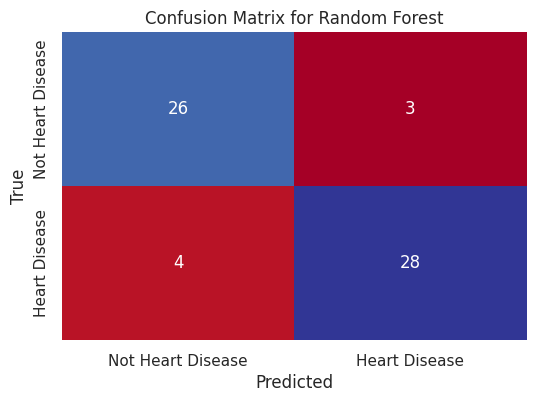


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



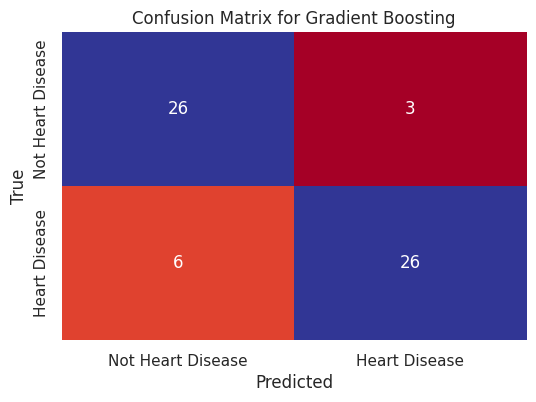


Model Performance Table:
                    Model  Accuracy       AUC
0     Logistic Regression  0.819672  0.926724
1                     KNN  0.836066  0.905172
2  Support Vector Machine  0.852459  0.927802
3           Random Forest  0.885246  0.946121
4       Gradient Boosting  0.852459  0.911638


In [44]:
# Function to train and evaluate classification models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    performance_table = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  

        # Classification report
        print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', cbar=False,
                    xticklabels=['Not Heart Disease', 'Heart Disease'],
                    yticklabels=['Not Heart Disease', 'Heart Disease'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Calculate accuracy and AUC
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        performance_table.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc
        })

    return pd.DataFrame(performance_table)

performance_df = train_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Display the model performance table
print("\nModel Performance Table:")
print(performance_df)

Best Model Based on AUC: Random Forest

Feature Importance Table:
            Feature  Importance
0   thalachh_boxcox    0.126703
1                cp    0.119356
2       oldpeak_log    0.114669
3             thall    0.110426
4               caa    0.107586
5               age    0.086409
6        trtbps_log    0.084254
7          chol_log    0.082949
8              exng    0.051496
9               slp    0.048331
10              sex    0.037892
11          restecg    0.021781
12              fbs    0.008148


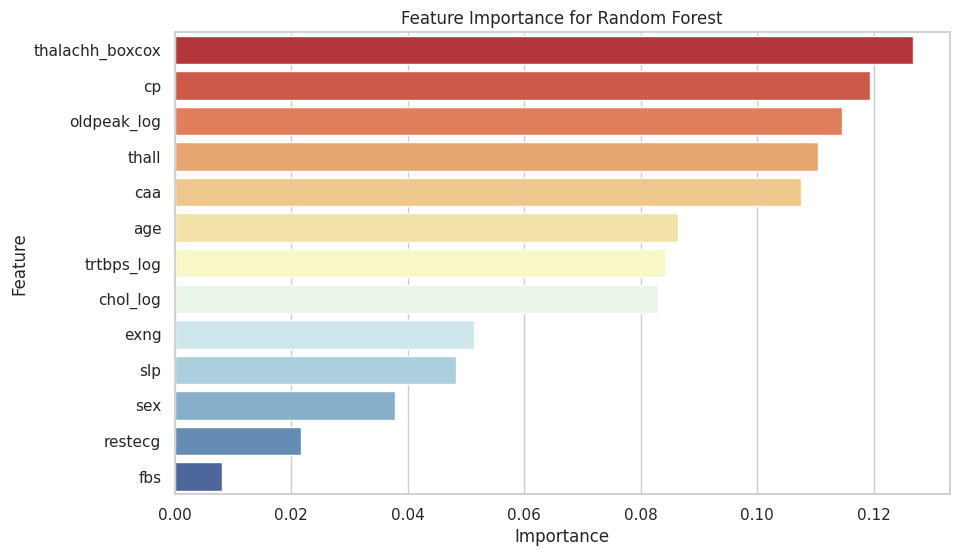

In [45]:
# Identify the best model based on AUC
best_model_name = performance_df.loc[performance_df['AUC'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"Best Model Based on AUC: {best_model_name}")

def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # For Logistic Regression
    else:
        raise ValueError("Model does not have feature importances.")

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Print feature importance table
    print("\nFeature Importance Table:")
    print(feature_importance_df.reset_index(drop=True))

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="RdYlBu")
    plt.title(f'Feature Importance for {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(best_model, X_train_scaled.columns)

Logistic Regression - Cross-Validated Accuracy: 0.7220
KNN - Cross-Validated Accuracy: 0.6639
SVM - Cross-Validated Accuracy: 0.6888
Random Forest - Cross-Validated Accuracy: 0.8133
Gradient Boosting - Cross-Validated Accuracy: 0.8049
Voting Classifier - Cross-Validated Accuracy: 0.7843

Voting Classifier - Test Accuracy: 0.8689, Test AUC: 0.9041

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



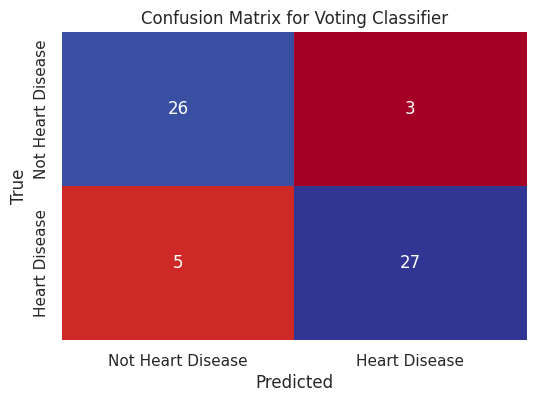

In [46]:
# Initialize base models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)  # Enable probability estimates for AUC calculation
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create a Voting Classifier (Ensemble)
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('knn', knn),
    ('svc', svc),
    ('rf', rf),
    ('gb', gb)
], voting='soft')  

# Cross-Validation for each model
models = [log_reg, knn, svc, rf, gb, voting_clf]
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']

for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validated Accuracy: {np.mean(cv_scores):.4f}")

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
y_pred = voting_clf.predict(X_test)
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]  # Get probabilities for AUC

# Calculate accuracy and AUC for the ensemble model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nVoting Classifier - Test Accuracy: {accuracy:.4f}, Test AUC: {auc:.4f}")

print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', cbar=False,
                xticklabels=['Not Heart Disease', 'Heart Disease'],
                yticklabels=['Not Heart Disease', 'Heart Disease'])
    plt.title('Confusion Matrix for Voting Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


Feature Importance Table:
            Feature  Importance Score
0               caa          0.426685
1             thall          0.426176
2               sex          0.314794
3       oldpeak_log          0.310165
4               slp          0.303547
5                cp          0.259219
6              exng          0.246990
7           restecg          0.137992
8        trtbps_log          0.074954
9          chol_log          0.066565
10              age          0.066028
11  thalachh_boxcox          0.050279
12              fbs          0.011748


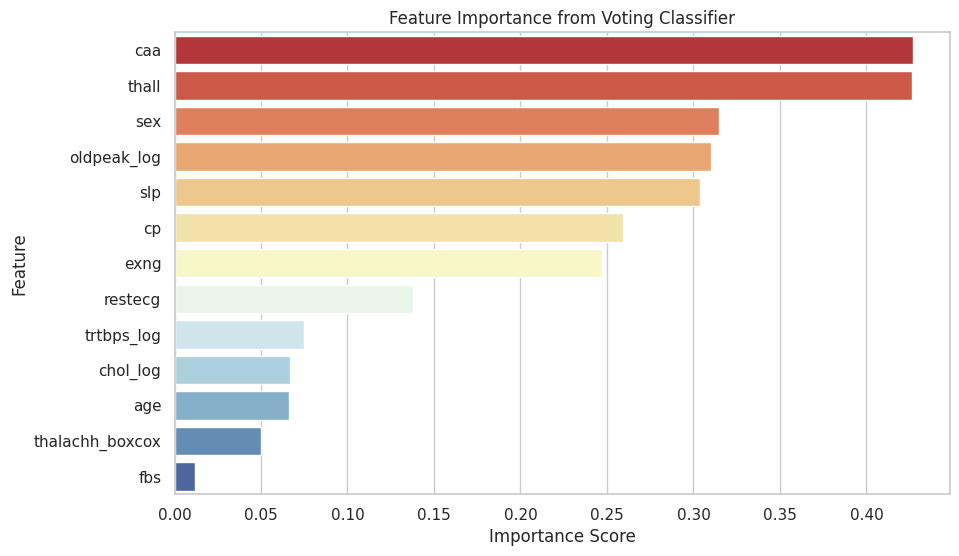

In [47]:
# Function to get feature importance
def get_feature_importance(voting_clf, feature_names):
    importance_dict = {}

    # Loop through each model in the Voting Classifier
    for name, model in voting_clf.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])  # For Logistic Regression
        else:
            continue  

        importance_dict[name] = importances

    importance_df = pd.DataFrame(importance_dict, index=feature_names)

    # Average the importances across all models
    averaged_importance = importance_df.mean(axis=1)

    return averaged_importance

# Get feature importance from the Voting Classifier
feature_importance = get_feature_importance(voting_clf, X_train_scaled.columns)

sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Feature Importance Table
importance_table = pd.DataFrame(sorted_feature_importance).reset_index()
importance_table.columns = ['Feature', 'Importance Score']
print("\nFeature Importance Table:")
print(importance_table)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index, palette="RdYlBu")
plt.title('Feature Importance from Voting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

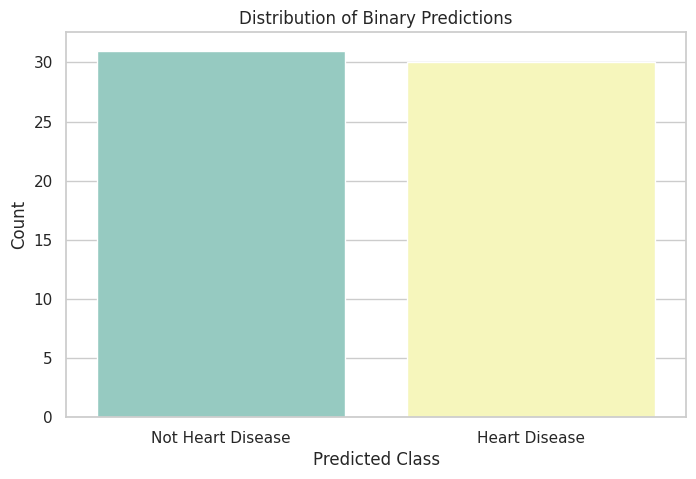

In [48]:
# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred, palette='Set3')
plt.title('Distribution of Binary Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Heart Disease', 'Heart Disease'])
plt.show()
